<a href="https://colab.research.google.com/github/LFiosx18/Modern-data-analysis-tools/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1 (numpy + matplotlib)

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
* На вход программа должна принимать 2 строки (т.е. должен быть реализован ввод с клавиатуры). Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.
* Систему уравнений необходимо решить матричным способом. Предусмотрите случаи, когда решения есть, решений нет, решений бесконечно много. Выведите ответ. Покажите решение на графике. Если решения есть, постройте график и точкой отметьте решение (если оно одно, например, функцией [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)).

1 2 3
4 5 6
Единственное решение: ( -1.0 ; 2.0 )


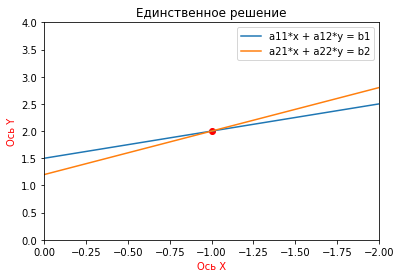

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a11, a12, b1 = list(map(float, input().split()))
a21, a22, b2 = list(map(float, input().split()))

O1 = round(np.linalg.det(np.array([[a11, a12], [a21, a22]])), 5)
V1 = np.array([b1, b2])
Ox = round(np.linalg.det(np.array([[b1, a12], [b2, a22]])), 5)
Oy = round(np.linalg.det(np.array([[a11, b1], [a21, b2]])), 5)

fig, ax = plt.subplots()
ax.set_xlabel('Ось Х', color = 'red')
ax.set_ylabel('Ось Y', color = 'red')
x = np.arange(-100, 100, 0.1)

if O1 != 0:
    X = round((Ox/O1), 5)
    Y = round((Oy/O1), 5)
    print("Единственное решение: (", X, ';', Y, ')')
    plt.axis([0,X*2,0,Y*2])
    plt.title('Единственное решение')
    plt.plot([X], [Y], 'ro')
    
    
else:
    plt.axis([-50,50,-50,50])
    if Ox == 0 and Oy == 0:
        print("Бесконечное множество решений")
        plt.title('Бесконечное множество решений')
    else:
        print("Решеший нет")
        plt.title('Решеший нет')


if a12 > 0:
    y1 = lambda x: (b1-a11*x)/a12
else:
    y1 = lambda x: (a11*x-b1)/(-a12)
if a22 > 0:
    y2 = lambda x: (b2-a21*x)/a22
else:
    y2 = lambda x: (a21*x-b2)/(-a22)

ax.plot(x, y1(x), label='a11*x + a12*y = b1')
ax.plot(x, y2(x), label='a21*x + a22*y = b2')
ax.legend()

plt.show()

# Задание 2 (pytorch + matplotlib)

Пусть $f(x) = \sin(x) * x$. Постройте график $f(x)$ и $\frac{df(x)}{dx}$, для расчета производных воспользуйтесь методом `backward()` и matplotlib для построения графиков.

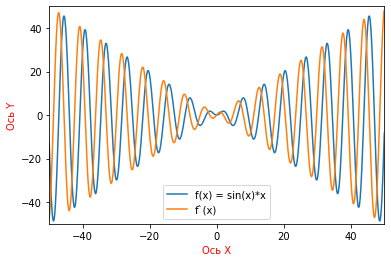

In [ ]:
import torch
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlabel('Ось Х', color = 'red')
ax.set_ylabel('Ось Y', color = 'red')

plt.axis([-50,50,-50,50])
x = np.arange(-100, 100, 0.1)
y = lambda x: np.sin(x) * x
plt.plot(x, y(x), label='f(x) = sin(x)*x')

x = torch.linspace(-50, 50, 500, requires_grad=True)
y = torch.sum(torch.sin(x)*x)
y.backward()
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label='f`(x)')
plt.legend()

plt.show()